### Convolutional Neural Network (CNN) to Classify Handwritten Digits

This project trains a compact convolutional neural network on the MNIST dataset to recognize handwritten digits. After normalizing the images and one-hot encoding the labels. The accuracy hits 99 % in under ten epochs. A confusion matrix then spots 2s and 4s as the hardest digits, offering an idea for future improvements.

In [37]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [71]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

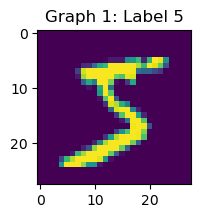

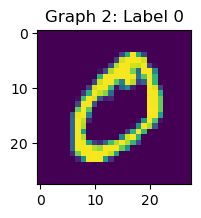

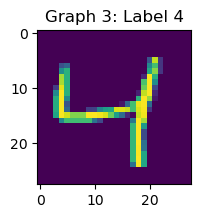

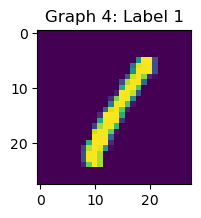

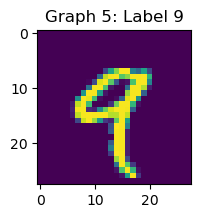

In [72]:
# Display the first five images and their labels
# For loop to print the first 5 images
for i in range(5):
    #Figure size
    plt.figure(figsize=(3,2))
    #Show image
    plt.imshow(train_images[i])
    # Title
    plt.title(f"Graph {i+1}: Label {train_labels[i]}")
    #Print image
    plt.show()

In [73]:
# split into test and train data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [87]:
# One hot encoder train
train_labels = to_categorical(train_labels)

In [88]:
#One hot encoder test
test_labels = to_categorical(test_labels)

In [75]:
# Build the CNN model
model = Sequential([
    # Get features from the images
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    # Pick the most important things from the image in 2x2 areas
    MaxPooling2D((2, 2)),
    # Get features from the images
    Conv2D(64, (2, 2), activation='relu'),
    # Pick the most important things from the image in 2x2 areas
    MaxPooling2D((2, 2)),
    # Flatten to 1D layers
    Flatten(),
    # Classification by connecting all neurons
    Dense(64, activation='relu'),
    # Prevent overfitting. Ignore .5 of the meurons
    Dropout(0.5),
    # Classification by connecting all neurons
    Dense(10, activation='softmax')])

In [76]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.7785 - loss: 0.6809 - val_accuracy: 0.9777 - val_loss: 0.0674
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9541 - loss: 0.1546 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9659 - loss: 0.1123 - val_accuracy: 0.9888 - val_loss: 0.0400
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9719 - loss: 0.0946 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9768 - loss: 0.0755 - val_accuracy: 0.9903 - val_loss: 0.0392
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9913 - val_loss: 0.0327
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.9836 - loss: 0.0552 - val_accuracy: 0.9915 - val_loss: 0.0330
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9852 - loss: 0.0479 - 

In [78]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9896 - loss: 0.0329


In [79]:
# Print results
print(f"Test accuracy: {test_acc * 100:.1f}%")

Test accuracy: 99.2%


In [84]:
# Predict the test images
test_predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [85]:
# Predict the test labels
test_predictions_labels = np.argmax(test_predictions, axis=1)

In [86]:
# Convert everything back
true_labels = np.argmax(test_labels, axis=1)

In [81]:
# Make a confusion matrix
cm = confusion_matrix(true_labels, test_predictions_labels)

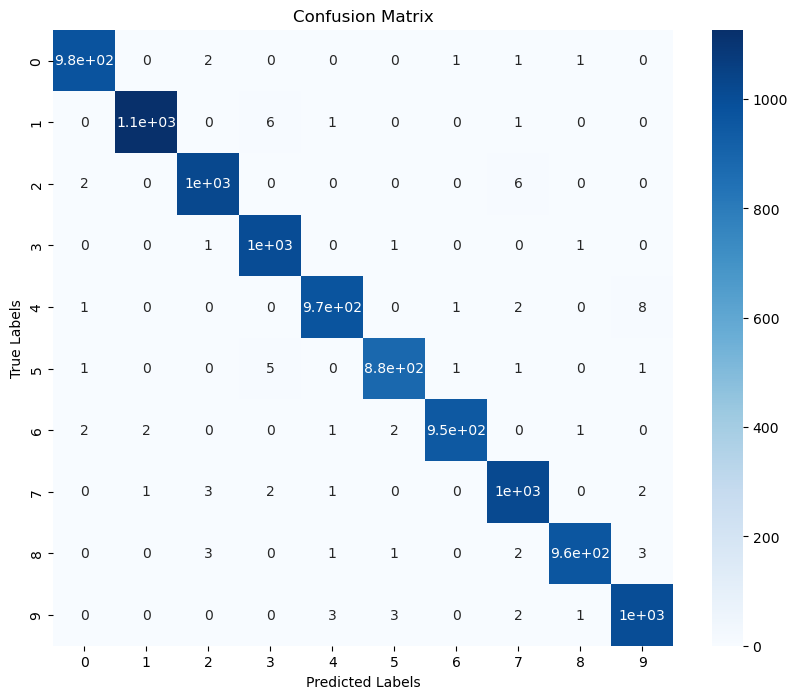

In [82]:
# Print confusion matrix
#Figure size
plt.figure(figsize=(10, 8))
#Heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
# x-axis
plt.xlabel('Predicted Labels')
#y-axis
plt.ylabel('True Labels')
# Title
plt.title('Confusion Matrix')
#Print matrix
plt.show()

#### Summarize results.
Number two and number four true labels had the hardest time making predictions.